In [6]:
# Import the Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import FinanceDataReader as fdr

plt.style.use('fivethirtyeight')

In [2]:
# Define a function to create and get the Bollinger Bands

def bollinger_bands(data, window_size = 30):
    rolling_mean = data['Close'].rolling(window=window_size).mean() # Simple Moving Average (SMA)
    rolling_std = data['Close'].rolling(window=window_size).std()
    data['UpperBand'] = rolling_mean + (2 * rolling_std)
    data['LowerBand'] = rolling_mean - (2 * rolling_std)

    return data


In [3]:
# Define a function to create and get the Relative Strength Index (RSI)

def RSI(data, window=13):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    RS = avg_gain / avg_loss
    RSI = 100 - (100 / (1 + RS))
    data['RSI'] = RSI
    data['Overbought'] = 70
    data['Oversold'] = 30 
    return data    

In [4]:
# Define a function to create and get the Trading Strategy
# Buy when the close price goes below Lower Band and the RSI is less than 30 and I currently do not have position
# Sell when the close price goes above the Upper Band and the RSI is greater than 60 and I currently have a position

def strategy(data): 
    position = 0 
    buy_price = []
    sell_price = [] 
    for i in range(len(data)):
        if data['Close'][i] < data['LowerBand'][i] and data['RSI'][i] < data['Oversold'][i] and position == 0:
            position = 1 
            buy_price.append(data['Close'])
            sell_price.append(np.nan)
        elif data['Close'][i] > data['UpperBand'][i] and data['RSI'][i] > data['Overbought'][i] and position == 1:
            position = 0 
            sell_price.append(data['Close'][i])
            buy_price.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
        
    return (buy_price, sell_price)
        
        


In [14]:
# Get the stock data 

start_date = '2019-06-01'
end_date = '2023-06-01'
 
df_fdr = fdr.DataReader('005930', start=start_date, end=end_date)
df_fdr

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-06-03,42950,43900,42500,43800,15466580,0.030588
2019-06-04,43400,43700,43000,43450,9913497,-0.007991
2019-06-05,44050,44200,43700,43900,12464135,0.010357
2019-06-07,43600,44350,43450,44200,11683682,0.006834
2019-06-10,44300,44850,44050,44800,8792182,0.013575
...,...,...,...,...,...,...
2023-05-25,69900,70000,68700,68800,14231160,0.004380
2023-05-26,69800,70400,69500,70300,19549511,0.021802
2023-05-30,71300,72300,71200,72300,27476897,0.028450


In [15]:
# Add the Bollinger Bands to the dataset
df_fdr = bollinger_bands(df_fdr)

# Add the RSI to the dataset
df_fdr = RSI(df_fdr)

In [16]:
# Implement the trading Strategy 
buy_price, sell_price = strategy(df_fdr)
df_fdr['Buy'] = buy_price
df_fdr['Sell'] = sell_price

ValueError: setting an array element with a sequence.

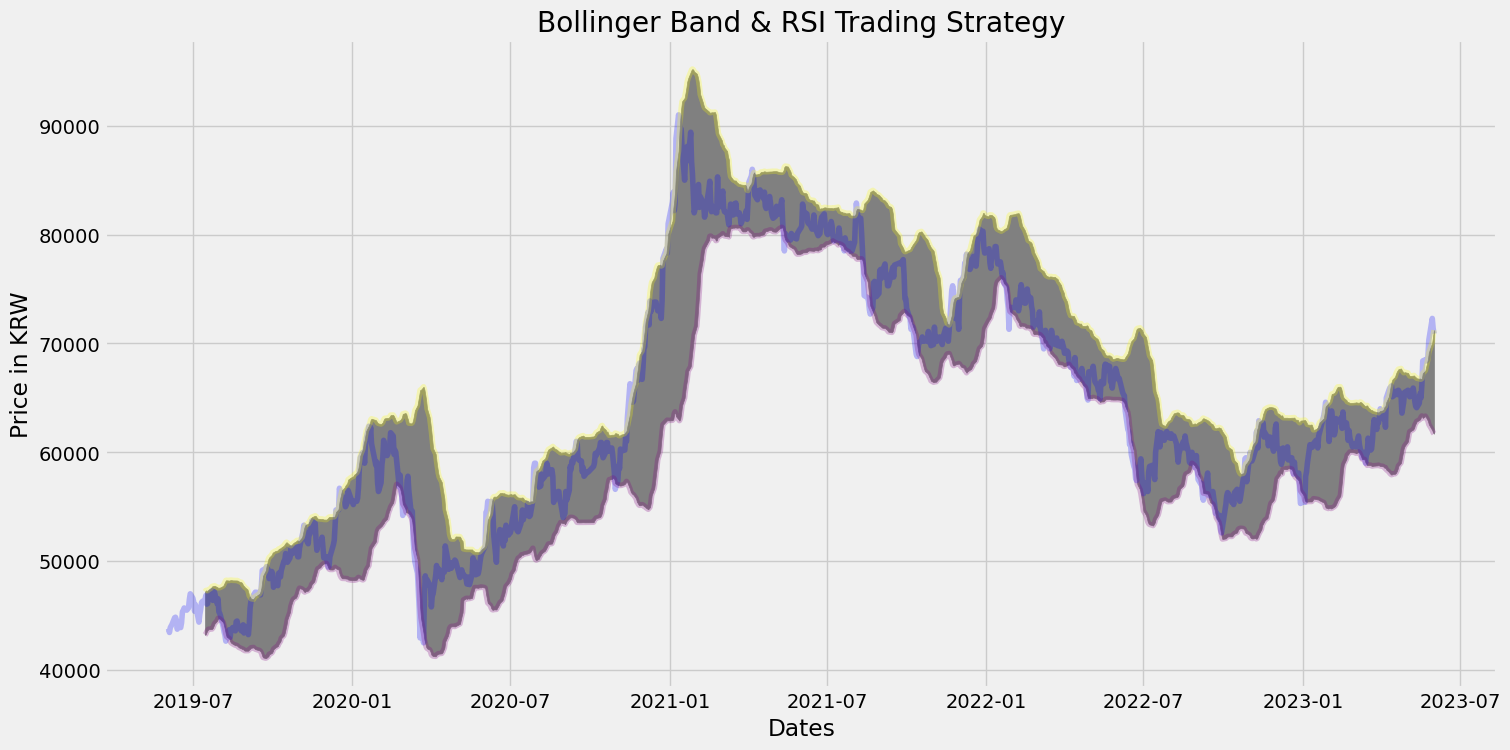

In [32]:
# Plot the Close Price, Bollinger Bands and the Trading Signals (Buy & Sell Signals)

fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Bollinger Band & RSI Trading Strategy')
plt.ylabel("Price in KRW")
plt.xlabel("Dates")
ax.plot(df_fdr['Close'], label='Close Price', alpha=0.25, color='blue')
ax.plot(df_fdr['UpperBand'], label='Upper Price', alpha=0.25, color='yellow')
ax.plot(df_fdr['LowerBand'], label='Lower Price', alpha=0.25, color='purple')
ax.fill_between(df_fdr.index, df_fdr['UpperBand'], df_fdr['LowerBand'], color='grey')
ax.scatter(df_fdr.index, np.array(df_fdr['Buy'], dtype=object), label='Buy', alpha=1, marker='^', color='green')
ax.scatter(df_fdr.index, np.array(df_fdr['Sell'], dtype=object), label='Sell', alpha=1, marker='v', color='red')
plt.legend()
plt.show()

In [29]:
np.array(df_fdr['Buy'])

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, Date
                                2019-06-03    43800
                                2019-06-04    43450
                                2019-06-05    43900
                                2019-06-07    44200
                                2019-06-10    44800
                                              ...
                                2023-05-25    68800
                                2023-05-26    70300
                                2023-05-30    72300
                                2023-05-31    71400
                                2023-06-01    70900
                                Name: Close, Length: 989, dtype: int64,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, n

In [25]:
df_fdr['Sell']

Date
2019-06-03   NaN
2019-06-04   NaN
2019-06-05   NaN
2019-06-07   NaN
2019-06-10   NaN
              ..
2023-05-25   NaN
2023-05-26   NaN
2023-05-30   NaN
2023-05-31   NaN
2023-06-01   NaN
Name: Sell, Length: 989, dtype: float64